In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None, encoding='utf=8')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None, encoding='utf=8')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### What are the ten most common movie names of all time?

In [5]:
titles.title.value_counts().head(10)

Hamlet                  19
Macbeth                 15
Carmen                  15
The Three Musketeers    11
Maya                    11
The Outsider            11
Othello                 11
Hero                    10
Anna Karenina           10
Paradise                10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [6]:
thirtys_movies = titles[(titles.year >= 1930) & (titles.year < 1940)]

In [7]:
thirtys_movies.year.value_counts().head(3)

1937    1188
1936    1129
1938    1125
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

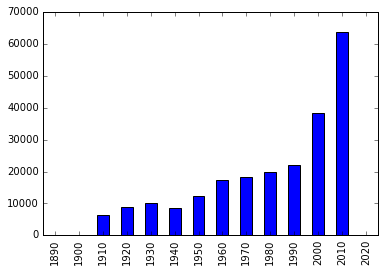

In [8]:
(titles.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

In [9]:
hamlet_titles = titles[titles.title == 'Hamlet']

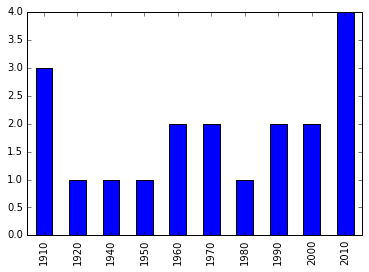

In [10]:
(hamlet_titles.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

In [11]:
rustler = cast[cast.character == "Rustler"]

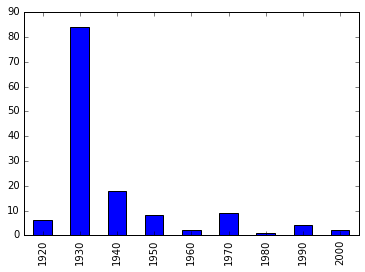

In [12]:
(rustler.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

In [13]:
hamlet_char = cast[cast.character == 'Hamlet']

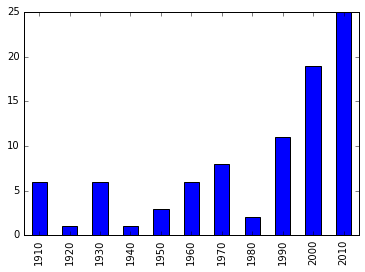

In [14]:
(hamlet_char.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [15]:
cast.character.value_counts().head(11)

Himself        19177
Dancer         11714
Extra          10377
Reporter        7930
Doctor          7230
Student         6787
Policeman       6732
Party Guest     6496
Nurse           6456
Bartender       6405
Minor Role      6158
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [16]:
herself = cast[cast.character == 'Herself']

In [17]:
herself.name.value_counts().head(10)

Joyce Brothers        14
Queen Elizabeth II    11
Margaret Thatcher      7
Mary Jo Pehl           7
Joan Rivers            6
Kareena Kapoor         5
Hillary Clinton        5
Jane Fonda             5
Caroline Rhea          5
Rekha                  5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [18]:
(cast[cast.character == "Himself"]).name.value_counts().head(10)

Adolf Hitler             96
Richard Nixon            43
Ronald Reagan            34
John F. Kennedy          27
Ron Jeremy               24
George W. Bush           22
Winston Churchill        21
Benito Mussolini         20
Bill Clinton             20
Franklin D. Roosevelt    20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [19]:
names1945 = cast[cast.year == 1945]

In [20]:
names1945.name.value_counts().head()

Emmett Vogan       39
Sam (II) Harris    31
Harold Miller      29
Bess Flowers       29
Nolan Leary        27
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [21]:
cast[cast.year == 1985].name.value_counts().head()

Mammootty        21
Sukumari         19
Shakti Kapoor    19
Mohanlal         15
Lou Scheimer     15
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

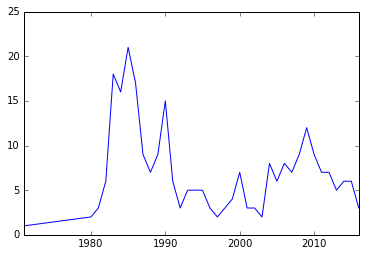

In [22]:
cast[cast.name == "Mammootty"].year.value_counts().sort_index().plot(kind='line')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [23]:
patron_in = cast[cast.character.str.startswith('Patron in')]

In [24]:
patron_in.character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             3
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Quiet Bar              2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [25]:
science = cast[cast.character.str.startswith('Science')]

In [26]:
science.character.value_counts().head(10)

Science Teacher         56
Science Fair Student     9
Science Student          9
Science Fair Judge       5
Science Promo Cadet      5
Science Club Member      5
Science Reporter         5
Science Kid              4
Science teacher          3
Science Fair Kid         3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

In [27]:
judi_dench = cast[cast.name == "Judi Dench"]

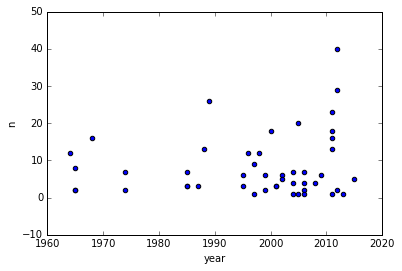

In [28]:
judi_dench.plot(x='year', y='n', kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

In [29]:
cary = cast[cast.name == "Cary Grant"]

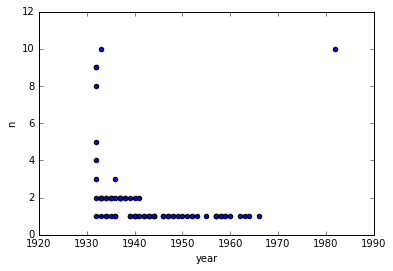

In [30]:
cary.plot(x='year', y='n', kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

In [31]:
sidney = cast[cast.name == "Sidney Poitier"]

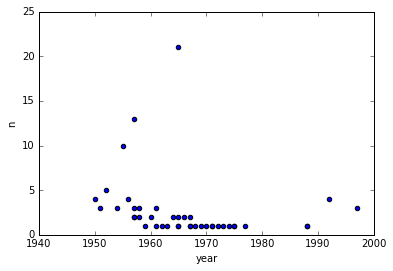

In [33]:
sidney.plot(x='year', y='n', kind='scatter', ylim=(0))

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [34]:
lead50s = cast[(cast.n == 1.0) & (cast.year >= 1950) & (cast.year < 1960)]

In [35]:
lead50s_actor = lead50s[lead50s['type'] == 'actor']

In [36]:
len(lead50s_actor)

6530

In [37]:
len(lead50s) - len(lead50s_actor)

2903

In [38]:
len(lead50s[lead50s['type'] == 'actress'])

2903

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [39]:
supporting50s = cast[(cast.n == 2.0) & (cast.year >= 1950) & (cast.year < 1960)]

In [40]:
len(supporting50s[supporting50s['type'] == 'actor'])

4481

In [41]:
len(supporting50s[supporting50s['type'] == 'actress'])

4502